<a href="https://www.kaggle.com/code/hugoguilhermepenco/lung-cancer-gridsearch-and-kfold?scriptVersionId=167034224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# EDA and preprocessing
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import warnings
# Balance dataset
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
# Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Data Preparation and EDA

In [2]:
df = pd.read_csv("/kaggle/input/lung-cancer-dataset/Lung_Cancer_Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

- no missing columns

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
# lowercasing column names
df.columns = [col.lower() for col in df.columns]
# Labeling gender
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'M' else 1)
# Labeling lung_cancer
df['lung_cancer'] = df['lung_cancer'].apply(lambda x: 0 if x == 'NO' else 1)

In [7]:
df.head(3)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0


In [8]:
# gender Distribution
gender_dist = df['gender'].value_counts().reset_index(name = 'count')
colors = ['#fde725', '#440154']
labels = ['Male', 'Female']
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=gender_dist['count'], 
                             hole=.3,
                             marker=dict(colors=colors)
                            )])

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title=dict(
        text="Gender Distribution",
        font=dict(
            size=24
        )
    )
)

fig.show()

In [9]:
corr_matrix = df.corr()

fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='Viridis')

fig.update_layout(
    title="Correlation Heatmap of Variables",
    height=900,  
    title_font=dict(size=24))

fig.show()

In [10]:
df['age'] = df['age'].astype(int)

# Create subplots
fig = make_subplots(rows=4, cols=4, subplot_titles=df.columns)
color_scale = 'viridis'
for i, column in enumerate(df.columns):
    hist_data = df[column]
    row_num = (i // 4) + 1
    col_num = (i % 4) + 1
    fig.add_trace(go.Histogram(x=hist_data, name=column), row=row_num, col=col_num)
    

fig.update_layout(height = 900, title_text="Feature Distribution", bargap = 0.01, showlegend=False)

fig.show()

In [11]:
color_mapping = {0: '#fde725', 1: '#440154'}
fig = px.histogram(df, x="lung_cancer", marginal="rug", color = 'lung_cancer',
                   hover_data=df.columns, color_discrete_map=color_mapping)

fig.update_layout(bargap = 0.01, title="Target Distributon(Skewed)")
fig.show()

## Imbalanced Dataset
When training a machine learning model with an imbalanced dataset, where one class has significantly more examples than others, there are several potential risks:

1. **Biased Model**
    - The model prioritizes learning to predict the majority class well, neglecting the minority class.
    - This leads to poor performance on the minority class, resulting in **high false negatives** and **low precision**.
2. **Difficulty in Learning Complex Patterns**:
    - With fewer examples, the model strugglesto learn complex patterns of the minority class.
    - This can lead to overfitting to the specific training data, resulting in poor generalization to unseen data.
    
    
### POSSIBLE SULUTION
- To solve this, we need to implement a technique called **SMOTE(Synthetic Minority Oversampling Technique)** which generates synthetic data points for the minority class, SMOTE helps balance the class distribution in the training data. This allows the model to focus on learning patterns from both the majority and minority classes more effectively.

# Applying SMOTE

Ok, so how SMOTE works:

1. SMOTE Identifies the class with the fewest examples as the minority class.
2. Randomly selects existing minority samples.
3. SMOTE uses k-Nearest Neighbors (kNN) to identify the k nearest neighbors of the chosen minority class sample in the feature space.
4. Then SMOTE randomly selects one of the k nerest neighbors and calculate the difference(vector) between the original minority class sample and its chosen neighbor.

**Here's the key idea**:
- The new synthetic data point lies along the line connecting the original sample and its neighbor in the feature space.
- This ensures the newly generated point shares similar characteristics with the original minority class sample.

Visual Representation:

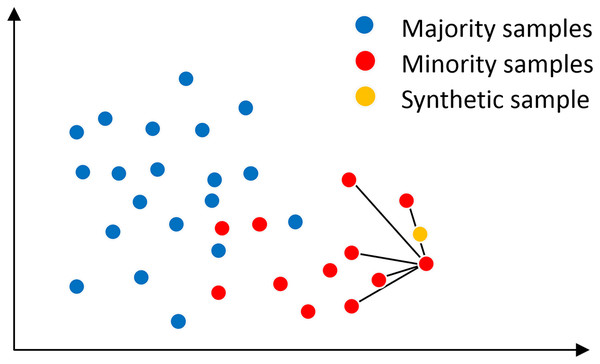
<br>
<small>https://peerj.com/articles/cs-1280/</small>

In [12]:
# features
x = df.drop('lung_cancer', axis = 1)
# target
y = df['lung_cancer']

sm = SMOTE()
# oversampling
x_resampled, y_resampled = sm.fit_resample(x, y)    
oversampled = pd.concat([y_resampled, x_resampled], axis = 1)

In [13]:
color_mapping = {0: '#fde725', 1: '#440154'}
fig = px.histogram(y_resampled, 
                   x="lung_cancer", 
                   marginal="rug", 
                   color = 'lung_cancer',
                   color_discrete_map=color_mapping)

fig.update_layout(bargap = 0.01, title="Target Distribution after SMOTE")
fig.show()

- Now the dataset is well balanced, we can proceed to modeling.

# Modeling + Metrics

In [14]:
# train and test split
x = oversampled.drop('lung_cancer', axis = 1)
y = oversampled['lung_cancer'].values

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [15]:
# GridSearch function
def get_best_model(estimator, params_grid = {}):
    model = GridSearchCV(estimator = estimator, param_grid = params_grid, cv = 3, scoring = 'accuracy', n_jobs = - 1)
    model.fit(x_train, y_train)
    print('\n--- Best Parameters-----------------------------')
    print(model.best_params_)
    print('\n--- Best Model---------------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model

# model fit function
def model_fit(model, feature_imp = True, cv = 5):
    clf = model.fit(x_train, y_train)
    # prediction
    y_pred = clf.predict(x_test)

    print('\n--- Train Set -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv)),np.std(cross_val_score(clf,x_train,y_train,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc'))))
    print('\n--- Validation Set -----------------------------')    
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv)),np.std(cross_val_score(clf,x_test,y_test,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc'))))
    print('-----------------------------------------------') 

    # reports
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes = class_names, title = 'Confusion Matrix')
    print(' ')

    # feature importance   
    if feature_imp:
        feat_imp = pd.Series(clf.feature_importances_,index=x_train.columns)
        feat_imp = feat_imp.nlargest(15).sort_values()
        plt.figure()
        plt.title("Most Important Features")
        feat_imp.plot(kind="barh")
        plt.show()
        
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
class_names = ['Success','Failure']       
        

## Random Forest


--- Best Parameters-----------------------------
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

--- Best Model---------------------------------
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=150,
                       random_state=42)

--- Train Set -----------------------------
Accuracy: 0.96295 +/- 0.0135
AUC: 0.98939 +/- 0.0074

--- Validation Set -----------------------------
Accuracy: 0.91645 +/- 0.0458
AUC: 0.97275 +/- 0.0311
-----------------------------------------------


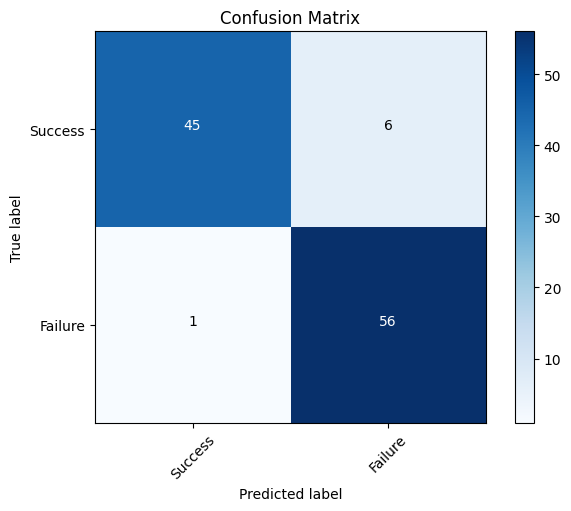

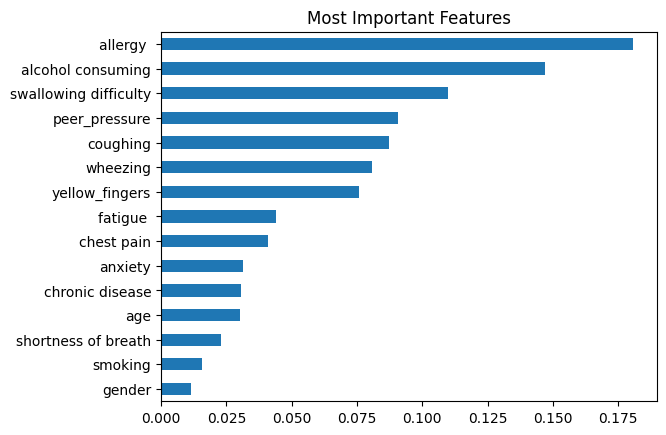

In [16]:
classifier_rf = RandomForestClassifier(random_state = 42)
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

clf_rf = get_best_model(classifier_rf, parameters)
model_fit(model = clf_rf, feature_imp = True)

## K-Nearest Neighbors


--- Best Parameters-----------------------------
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

--- Best Model---------------------------------
KNeighborsClassifier(p=1, weights='distance')

--- Train Set -----------------------------
Accuracy: 0.92585 +/- 0.0176
AUC: 0.97544 +/- 0.0187

--- Validation Set -----------------------------
Accuracy: 0.92511 +/- 0.0646
AUC: 0.96606 +/- 0.0528
-----------------------------------------------


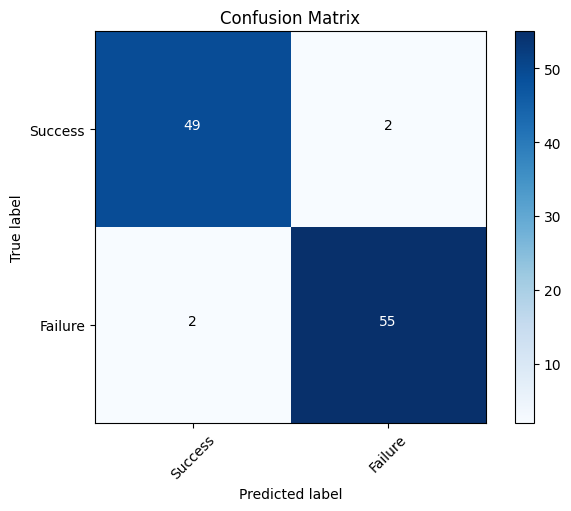

In [17]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [5,6,7],
              'p':[1,2],
              'weights':['uniform', 'distance']}

clf_knn = get_best_model(knn, parameters)
model_fit(model = clf_knn, feature_imp = False)

## Naive Bayes


--- Best Parameters-----------------------------
{'var_smoothing': 1e-09}

--- Best Model---------------------------------
GaussianNB()

--- Train Set -----------------------------
Accuracy: 0.92355 +/- 0.0122
AUC: 0.98256 +/- 0.0096

--- Validation Set -----------------------------
Accuracy: 0.91688 +/- 0.0338
AUC: 0.97956 +/- 0.0252
-----------------------------------------------


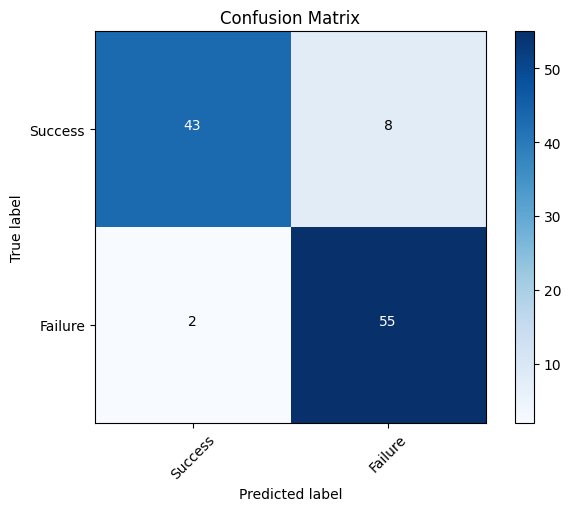

In [18]:
nb = GaussianNB()
parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
clf_nb = get_best_model(nb, parameters)
model_fit(model = clf_nb, feature_imp = False)

## Logistic Regression


--- Best Parameters-----------------------------
{'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}

--- Best Model---------------------------------
LogisticRegression(max_iter=300, random_state=42, solver='newton-cg')

--- Train Set -----------------------------
Accuracy: 0.96758 +/- 0.0087
AUC: 0.98962 +/- 0.0061

--- Validation Set -----------------------------
Accuracy: 0.91602 +/- 0.0560
AUC: 0.98439 +/- 0.0192
-----------------------------------------------


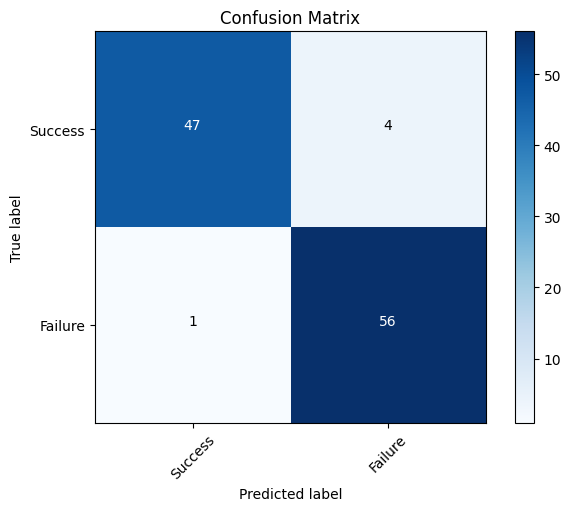

In [19]:
lg = LogisticRegression(random_state=42)
parameters = { 
              'max_iter': [300, 500, 1000],
              'penalty':['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
clf_lg = get_best_model(lg,parameters)
model_fit(model=clf_lg, feature_imp=False)

## XGradient Boosting


--- Best Parameters-----------------------------
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}

--- Best Model---------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

--- Train Set -----------------------------
Accuracy: 0.95368 +/- 0.0

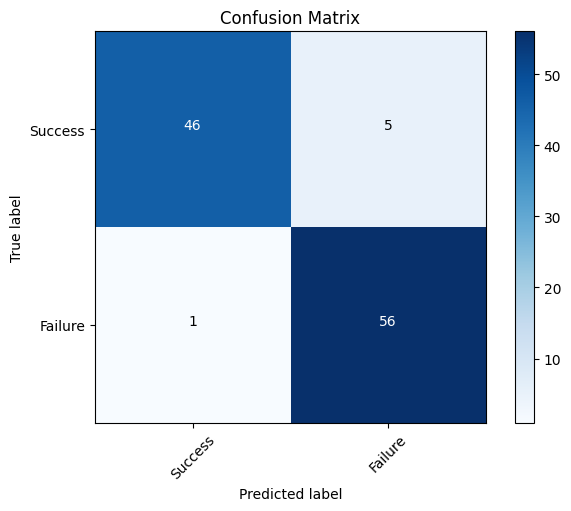

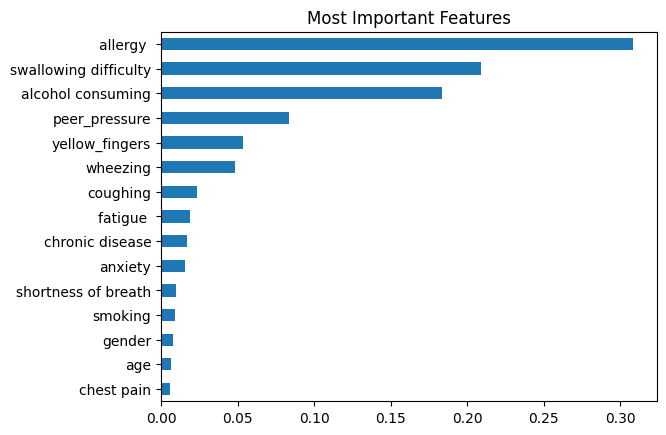

In [20]:
xgb = XGBClassifier(random_state = 42)
parameters = {
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 500],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
}

clf_xgb = get_best_model(xgb,parameters)
model_fit(model = clf_xgb, feature_imp = True)

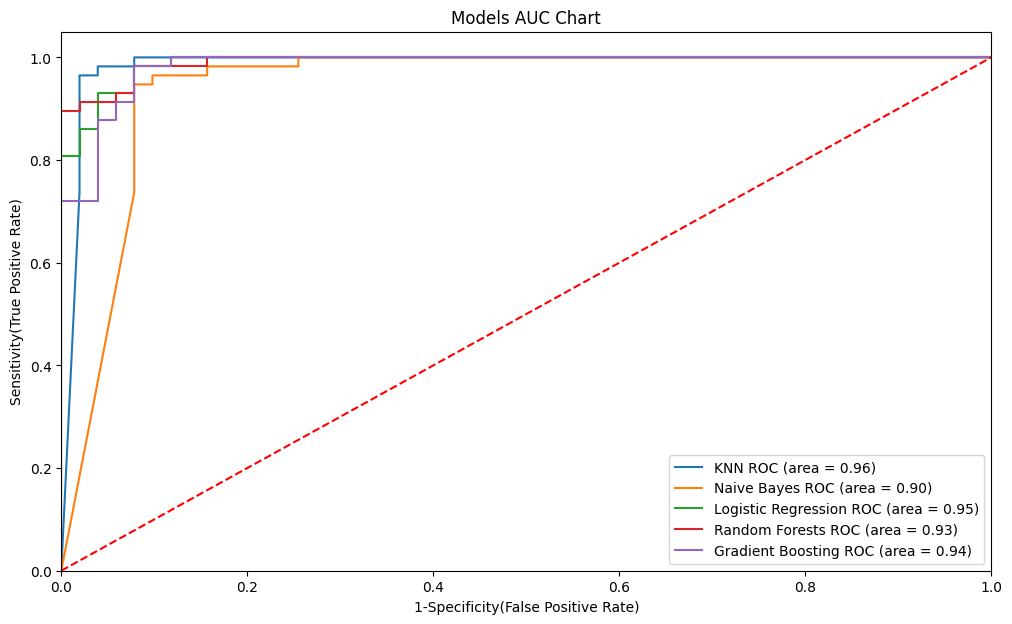

In [21]:
plt.figure(figsize = (12, 7))
models = [
{
    'label': 'KNN',
    'model': clf_knn,
},
{
    'label': 'Naive Bayes',
    'model': clf_nb,
},
{
    'label': 'Logistic Regression',
    'model': clf_lg,
},
{
    'label': 'Random Forests',
    'model': clf_rf,
},
{
    'label': 'Gradient Boosting',
    'model': clf_xgb,
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Models AUC Chart')
plt.legend(loc="lower right")
plt.show()   # Display

# K-Fold Cross-Validation

In [22]:
# Compare model performance(KFold)
clfs= [clf_knn, clf_nb, clf_lg, clf_rf, clf_xgb]
index =['KNN', 'Naive Bayes', 'Logistic Regression','Random Forests', 'XG Boost']
scores=[]
for clf in clfs:
    score = np.mean(cross_val_score(clf,x_test,y_test,cv=5,scoring = 'accuracy'))
    scores = np.append(scores,score)
models = pd.Series(scores,index=index)
models.sort_values(ascending=False)

KNN                    0.925108
Naive Bayes            0.916883
Random Forests         0.916450
Logistic Regression    0.916017
XG Boost               0.916017
dtype: float64